### Class 3

Last two sessions, we've seen:

- Variables formats (Integer, float, string, lists).
- Python specific operations:
    - Loops: For/While.
    - Conditionality: If/else statements.
- How to interact with users: input.
- How to generate random numbers.

Today's sessions will be about:

- Matrixes and Vectors: ordinary least squares with `numpy`
- Dataframes with `pandas`

Along with these two packages, you'll have to understand all the material done prior.

### Matrixes and Vectors

As economists, a big part of our job involves manipulating dataset. The core of our work is to manipulate matrixes of number and summarize their information.

    - We will create a simple dataset - matrixes to be precise
    - And perform statistical analysis with it.
    
Base python does not allow to do this well, let's install the package `numpy`

For those who do not want to use anaconda (not recommended)

In [3]:
!pip install numpy 

For those willing to use anaconda - go back to anaconda

In [4]:
conda activate python-econ
conda install numpy

SyntaxError: invalid syntax (2995654918.py, line 1)

### Application I - The gender gap

We will simulate the following exercise:
 - Imagine you have a dataset of 200 persons.
 - These persons can be male or female with probability 50%
 - These persons have a productivity parameter sigma normally distributed N(10,5)
 - The wage of each individual is equal to:
 $w_i = 100 + 100*sigma_i + 50*male + epsilon_i$ 

To simulate the dataset: generate random numbers.

In [8]:
# We import the library and its functionalities
# numpy to store numbers in matrixes and vectors
import numpy as np

# First, let's draw the gender of our sample - we draw integers
gender = np.random.randint(low = 0, high = 2, size=200)

# You can also compute the average share of women
print("The array is of type:", type(gender))  # Print the first 5 individuals of our sample
print(100*np.mean(1-gender), "% of the sample are women")
print(gender[:5])  # Print the first 5 individuals of our sample

The array is of type: <class 'numpy.ndarray'>
45.5 % of the sample are women
[1 0 0 0 1]


In [9]:
# Let's now generate productivity - we want to sample a random productivity number
productivity = np.random.normal(loc = 20, scale = 5, size = 200) 

# Here we generated random numbers of mean 20, and of variance 5. 200 of them

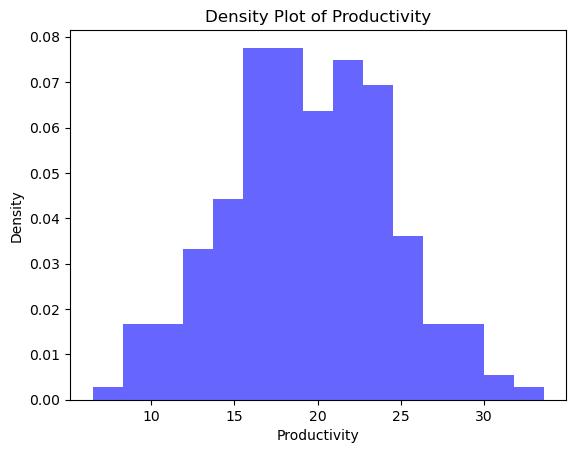

In [10]:
import matplotlib.pyplot as plt

# Instantiate a figure
plt.figure()
plt.hist(productivity, bins=15,density=True, alpha=0.6, color='b')  # Make up some bins so we get some form of "density"
# Write title, xlabel and y alabel
plt.title('Density Plot of Productivity')
plt.xlabel('Productivity')
plt.ylabel('Density')
plt.show()

In [11]:
# Now that we have both gender and productivity, we can generate wages with a gender gap, and let's add an error
wages = 100 + 100*productivity + 50*gender + np.random.normal(0, 50, 200)
print(wages[:5])

[3276.5430779  1643.28047099 2378.13412363 2644.93151398 2551.13249882]


We now have a dataset, for 200 individuals:

- their gender
- their productivity
- their wages

How do we estimate the parameters of the model?

Ordinary Least Square (OLS)! The formula is 

$\hat \beta = (X'X)^{-1}X'y$

What is the matrix X?

In [12]:
# Let's build the matrix X
constant = np.ones(200)
X = np.vstack((constant, productivity, gender))
# Create a small display of it
print(X.shape)
print('Matrix X has', X.shape[0], 'rows and', X.shape[1], 'columns')

(3, 200)
Matrix X has 3 rows and 200 columns


In [13]:
# Usually, an observation will be a row, and a variable a column
X = X.T # Transpose the dataset so that's the case
print(X[:6, :]) # Print the first 6 individuals

[[ 1.         31.05903607  1.        ]
 [ 1.         15.90197957  0.        ]
 [ 1.         23.14482949  0.        ]
 [ 1.         25.09026625  0.        ]
 [ 1.         23.67905904  1.        ]
 [ 1.         15.75156128  0.        ]]


In [14]:
# The matrix Y we already have, it is the matrix of wages
Y = wages

# We are ready to do the regression
beta = np.linalg.inv(X.T @ X) @ (X.T @ Y) # The syntax for matrix calculations is a bit weird
print(beta.T)

[104.2194594  100.09558729  40.09969242]


In [15]:
print('The estimated constant is', round(beta[0], 2), '€')
print('The estimated gender gap is', round(beta[2], 2), '€')
print('The estimated productivity contribution to wages is', round(beta[1],2), '€')

The estimated constant is 104.22 €
The estimated gender gap is 40.1 €
The estimated productivity contribution to wages is 100.1 €


Let's get the standard errors and the confidence intervals! The formula for the standard error of the residuals is:

$V(\hat \beta) = (X'X)^{-1}\hat{V(\epsilon|X)}$

In [16]:
# Let's compute the residuals
residual = Y - beta @ X.T # That's the value minus the predicted value
print(residual[:5])
print(np.mean(residual))

[ 23.35147033 -52.65697218 -42.78063662  29.28711888  36.6440258 ]
8.322444955410901e-12


In [17]:
# Let compute the variance of that residual
res_var = residual @ residual.T / (200 - 3) # Divide by the number of degree of freedom
print(res_var)

1978.2913370693038


In [18]:
# We're ready to compute the variance covariance matrix we've just created
beta_var = res_var * np.linalg.inv(X.T @ X)
print(beta_var)

[[ 1.77256683e+02 -7.93087532e+00 -2.45209801e+01]
 [-7.93087532e+00  4.04449000e-01  1.41848264e-01]
 [-2.45209801e+01  1.41848264e-01  3.99386760e+01]]


We have the coefficients point estimates and we have the variance covariance matrixes. We can compute the confidence intervals!

The 95% Confidence interval is defined as:

point estimate value +- 1.96 times the variance (when the sample is big enough)


In [19]:
# Let's compute the confidence interval of each of our estimated coefficients
lower_bound = beta - 1.96*np.diagonal(beta_var)
print(lower_bound)

[-243.20363945   99.30286725  -38.18011262]


In [20]:
upper_bound = beta + 1.96*np.diagonal(beta_var)
print(upper_bound)

[451.64255825 100.88830733 118.37949746]


In [21]:
# Let's do a nice plot
print(beta)
print(lower_bound)
print(upper_bound)

[104.2194594  100.09558729  40.09969242]
[-243.20363945   99.30286725  -38.18011262]
[451.64255825 100.88830733 118.37949746]


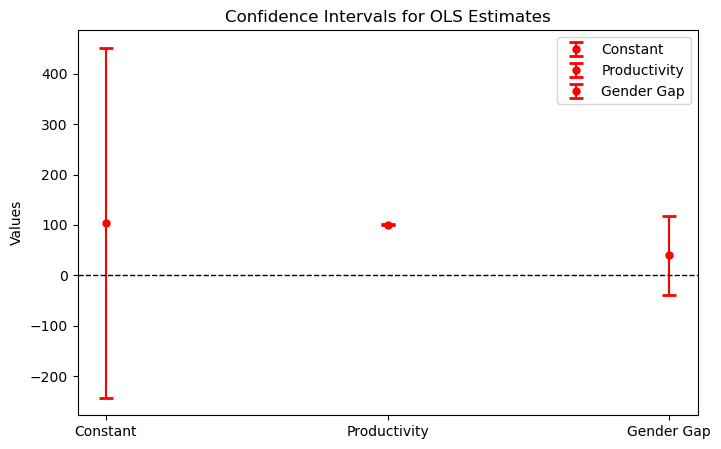

In [22]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# How many parameters are we drawing?
n = len(beta)
name_parameters = ['Constant', 'Productivity', 'Gender Gap']
# Plot each point with its confidence interval
for i in range(n):
    ax.errorbar(i, beta[i], yerr=[[beta[i] - lower_bound[i]], [upper_bound[i] - beta[i]]],
                fmt='o', color='red', markersize=5, capsize=5, capthick=2, label=name_parameters[i])
# Add a horizontal dashed line at y=0 in black
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Customizing the plot
ax.set_xticks(range(n))
ax.set_xticklabels([name_parameters[i] for i in range(n)])
ax.set_ylabel('Values')
ax.set_title('Confidence Intervals for OLS Estimates')
ax.legend()
# Show the plot
plt.show()

####  Putting everything together

The whole regression exercise, put it together in a function, that takes as arguments:

- Number of elements in the sample
- Variance of the error terms in the wage equation

Tell me:

- Over 10 regressions, how large must the sample be so that we're kind of sure we'll get significant results?


#### Exercice 6 - Creating a sampling function

Create a function that sample a number of individuals equal to n with their gender, productivity and wages. 

In [23]:
### Let's build a sampling function first
def sample(n=200, error=50):
    
    # Here sample genders
    gender = np.random.randint(low = 0, high = 2, size = n)
    
    # Then sample productivities
    productivity = np.random.normal(loc = 20, scale = 5, size = n) 

    # Then sample wages, and put an error
    wages = 100 + 100*productivity + 50*gender + np.random.normal(loc = 0, scale = error, size = n)
    
    # Format the X and format the y such that they are ready for regression
    constant = np.ones(n)
    X = np.vstack((constant, productivity, gender)).T
    y = wages
    
    return(X, y)
    

#### Exercice 7 - Creating a regression function

The function should take as input matrixes X and y, and return as an output beta, lower_bound and upper_bound

In [24]:
### Let's now build the regression function
def get_estimates(X,y):
    
    # Get the number of individuals and of variables
    ninds = X.shape[0]
    nvars = X.shape[1]
    degree_free = ninds - nvars

    # We are ready to do the regression
    beta = np.linalg.inv(X.T @ X) @ (X.T @ y) # The syntax for matrix calculations is a bit weird
    
    # Now let's get the error term
    residual = y - beta @ X.T
    
    # Get the variance of the rediduals
    res_var = residual @ residual.T / degree_free # Divide by the number of degree of freedom
    beta_var = res_var * np.linalg.inv(X.T @ X)
    
    # Compute upper bounds and lower bounds
    lower_bound = beta - 1.96*np.diagonal(beta_var)
    upper_bound = beta + 1.96*np.diagonal(beta_var)
    
    
    # Get the variance
    return(beta, upper_bound, lower_bound)

 #### Exercise 8 - Plotting function
 
The function should take as input beta, the lower bound, the upper bound and return a graph of the three coefficients
 

In [25]:
def plot_coefs(beta, upper_bound, lower_bound):
    
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))

    # How many parameters are we drawing?
    n = len(beta)
    name_parameters = ['Constant', 'Productivity', 'Gender Gap']

    # Plot each point with its confidence interval
    for i in range(n):
        ax.errorbar(i, beta[i], yerr=[[beta[i] - lower_bound[i]], [upper_bound[i] - beta[i]]],
                    fmt='o', color='red', markersize=5, capsize=5, capthick=2, label=name_parameters[i])

    # Add a horizontal dashed line at y=0 in black
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    
    # Customizing the plot
    ax.set_xticks(range(n))
    ax.set_xticklabels([name_parameters[i] for i in range(n)])
    ax.set_ylabel('Values')
    ax.set_ylim([-100, 200])
    ax.grid(False)
    ax.set_title('Confidence Intervals for OLS Estimates')
    ax.legend()
    
    # Show the plot
    plt.show()

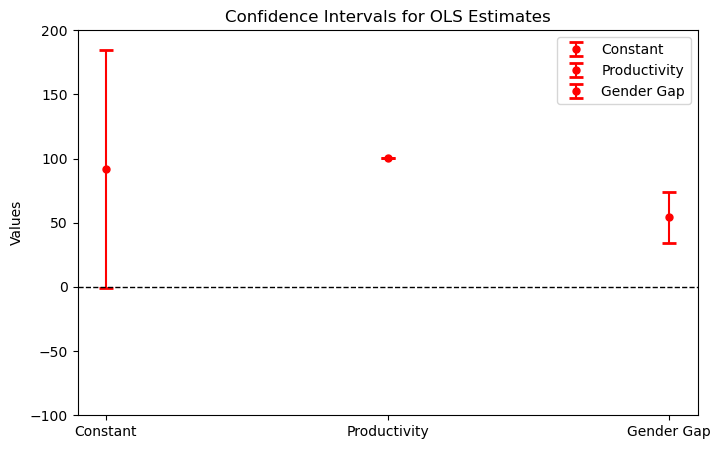

In [26]:
import matplotlib
matplotlib.style.use('seaborn-v0_8-colorblind')

# Do everything here to see if it works.
X, y = sample(n=1000, error=50)
beta, upper_bound, lower_bound = get_estimates(X,y)
plot_coefs(beta, upper_bound, lower_bound)

#### Exercise 9 - What sample size should you use?

Find the minimum sample size (more or less 10) such that 95% of the time the estimated coefficients will all be significant at the 95% level? -- set variance of the error at 50.

1. Create a for loop that loops around sample size
2. Create a second for loop that repeats the experiment at least 200 times
3. Record how many of these 200 times were significant.

In [27]:
def all_significant(n = 200):
    
    # Generate the sample
    X, y = sample(n=n, error=50)
    
    # Do the regression
    beta, upper_bound, lower_bound = get_estimates(X,y)
    
    # Assess whether all coeffs are significant
    condition = all(lower_bound > 0)
    
    # return the condition
    return(condition)
    

In [28]:
# What are the sample size we want to test?
sample_to_test = np.linspace(start = 500, stop = 1100, num = int((1000 - 500)/50 + 1))
record_results = list()
# Loop around the sample size
for sample_size in sample_to_test:
    
    # Now we want to reproduce that exercise many times
    proportion_significant = list()
    
    # Loop around it, we want to do it 200 times
    for exp in range(200):
        
        proportion_significant.append(all_significant(n=int(sample_size)))
    
    record_results.append(np.mean(proportion_significant))

print(record_results)

[0.0, 0.0, 0.0, 0.005, 0.05, 0.14, 0.43, 0.645, 0.8, 0.955, 1.0]


### Numpy is not super clear

Numpy is not super clear, you're manipulating matrixes, and their not super user friendly for us economists, who wand to see our data

### Introducing pandas

Not the animal - paneldata := pandas

In [242]:
!pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.5 MB 5.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/11.5 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.5 MB 5.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.5 MB 5.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.5 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.5 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/11.5 MB 5.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.5 MB 5.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.6/11.5 MB 5.8 MB/s eta 0:00:02
   --------- ------------------------------ 2.8/11.5 MB 5.8 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/11.5 MB 5.8 MB/s eta 0:00:02
   ---

In [29]:
# Unpack the library on your computer
import pandas as pd

# Make up a random dataset
X,y = sample()
dataset = np.hstack((X,np.expand_dims(y,1)))

# let's sample again our data
dataset = pd.DataFrame(dataset, columns = ['Constant', 'Productivity', 'Gender', 'Wages'])

In [30]:
print(dataset)

     Constant  Productivity  Gender        Wages
0         1.0     19.029342     0.0  1935.932051
1         1.0     17.630206     1.0  1913.657400
2         1.0     21.545112     1.0  2349.208258
3         1.0     18.970733     0.0  2055.991384
4         1.0     23.925847     0.0  2474.827755
..        ...           ...     ...          ...
195       1.0     17.325804     0.0  1832.108536
196       1.0     22.029262     0.0  2392.693692
197       1.0     13.570199     0.0  1468.243523
198       1.0     18.776930     0.0  1906.147751
199       1.0      9.286400     0.0   978.077956

[200 rows x 4 columns]


From now on, you should only use numpy if you're building code that needs to run really fast:

- With pandas you make less errors
- You create clearer code
- It's better suited for analysis

head() and tail() function serve to see the data better

In [31]:
print(dataset.tail())

     Constant  Productivity  Gender        Wages
195       1.0     17.325804     0.0  1832.108536
196       1.0     22.029262     0.0  2392.693692
197       1.0     13.570199     0.0  1468.243523
198       1.0     18.776930     0.0  1906.147751
199       1.0      9.286400     0.0   978.077956


To create new columns, It's possible to do the same as before

In [32]:
dataset['Hours_per_week'] = np.random.randint(low = 15, high = 45, size = dataset.shape[0])
print(dataset.head())

   Constant  Productivity  Gender        Wages  Hours_per_week
0       1.0     19.029342     0.0  1935.932051              19
1       1.0     17.630206     1.0  1913.657400              28
2       1.0     21.545112     1.0  2349.208258              29
3       1.0     18.970733     0.0  2055.991384              22
4       1.0     23.925847     0.0  2474.827755              44


To create new columns, you can combine existing columns

In [33]:
# Create new column called hourly wage
dataset['hourly_wage'] = dataset['Wages']/dataset['Hours_per_week']
print(dataset.head())

   Constant  Productivity  Gender        Wages  Hours_per_week  hourly_wage
0       1.0     19.029342     0.0  1935.932051              19   101.891161
1       1.0     17.630206     1.0  1913.657400              28    68.344907
2       1.0     21.545112     1.0  2349.208258              29    81.007181
3       1.0     18.970733     0.0  2055.991384              22    93.454154
4       1.0     23.925847     0.0  2474.827755              44    56.246085


Unlike numpy, you can return easily many statistics

In [34]:
dataset[["Gender", "Wages"]].describe()

,Gender,Wages
count,200.000000,200.000000
mean,0.510000,2112.149975
std,0.501154,517.113999
min,0.000000,540.627792
25%,0.000000,1803.463224
50%,1.000000,2143.691506
75%,1.000000,2461.690297
max,1.000000,3825.724427


These statistics can be created by groups

In [35]:
dataset.groupby('Gender').agg(['min', 'max'])

Constant      Productivity                  Wages               \
            min  max          min        max         min          max   
Gender                                                                  
0.0         1.0  1.0     4.431297  29.355927  540.627792  2997.035057   
1.0         1.0  1.0     6.794470  36.767465  791.796479  3825.724427   

       Hours_per_week     hourly_wage              
                  min max         min         max  
Gender                                             
0.0                16  44   16.382660  175.755453  
1.0                15  44   29.325796  195.346754

In [36]:
dataset.groupby("Gender").agg(
    {
        "Productivity": ["min", "max", "median", "mean"],
        "Wages": ['median', 'mean']
    }
).T

Gender                       0.0          1.0
Productivity min        4.431297     6.794470
             max       29.355927    36.767465
             median    19.960903    20.251846
             mean      19.543160    20.045157
Wages        median  2101.402849  2194.870775
             mean    2058.583207  2163.616086

We can also do apply some conditional functions
- Introducing `apply`

In [37]:
dataset['gender_string'] = dataset['Gender'].apply(lambda x: 'Female' if x == 0 else 'Male')
print(dataset)

     Constant  Productivity  Gender        Wages  Hours_per_week  hourly_wage  \
0         1.0     19.029342     0.0  1935.932051              19   101.891161   
1         1.0     17.630206     1.0  1913.657400              28    68.344907   
2         1.0     21.545112     1.0  2349.208258              29    81.007181   
3         1.0     18.970733     0.0  2055.991384              22    93.454154   
4         1.0     23.925847     0.0  2474.827755              44    56.246085   
..        ...           ...     ...          ...             ...          ...   
195       1.0     17.325804     0.0  1832.108536              40    45.802713   
196       1.0     22.029262     0.0  2392.693692              23   104.030161   
197       1.0     13.570199     0.0  1468.243523              34    43.183633   
198       1.0     18.776930     0.0  1906.147751              30    63.538258   
199       1.0      9.286400     0.0   978.077956              29    33.726826   

    gender_string  
0      

To modify the values in column, you can also use indexing:
- Introduction `loc`

In [38]:
# To access elements from a pandas, the first method is loc
print(dataset.loc[[5, 10], ['Gender', 'gender_string']])

    Gender gender_string
5      1.0          Male
10     1.0          Male


In [39]:
print(dataset.loc[1, 'Wages'])

1913.657399893403


`loc` uses the external indexing of pandas

In [40]:
print(dataset[['Constant', 'Productivity', 'Gender']].head())

   Constant  Productivity  Gender
0       1.0     19.029342     0.0
1       1.0     17.630206     1.0
2       1.0     21.545112     1.0
3       1.0     18.970733     0.0
4       1.0     23.925847     0.0


You can also use relative indexing 

- Introducing `iloc`

In [41]:
print(dataset.iloc[1, 1])

17.630206062482593


In [42]:
print(dataset.iloc[1:10, 1:4])

   Productivity  Gender        Wages
1     17.630206     1.0  1913.657400
2     21.545112     1.0  2349.208258
3     18.970733     0.0  2055.991384
4     23.925847     0.0  2474.827755
5     25.704040     1.0  2709.448279
6     14.931182     0.0  1630.789249
7     20.563434     0.0  2071.740048
8     17.004917     1.0  1820.802410
9     18.768345     0.0  1958.665638


What's the difference?

- In pandas, each row has an external indexing - which does not correspond to the original indexing

In [43]:
shuffled_dataset = dataset[['Constant', 'Productivity']].sample(frac=1)
print(shuffled_dataset.head())


     Constant  Productivity
126       1.0     12.338084
88        1.0     14.079758
96        1.0     27.190395
188       1.0     20.337086
40        1.0     30.488812


Now, the commands `iloc` and `loc` won't coincide anymore

In [44]:
print(shuffled_dataset.iloc[0,])
print(shuffled_dataset.loc[0,])

Constant         1.000000
Productivity    12.338084
Name: 126, dtype: float64
Constant         1.000000
Productivity    19.029342
Name: 0, dtype: float64


### Pandas is a reference for many

Pandas is used by everyone, so much so that it's integrated with many databases you might use on a regular basis. Take Eurostat:

https://ec.europa.eu/eurostat

You can access it with pandas from python!

In [45]:
!pip install eurostat

With the package, let's download series about house prices in Europe

In [66]:
import eurostat
data = eurostat.get_data_df('ei_hppi_q')
print(data)

    freq  indic     unit geo\TIME_PERIOD  2005-Q1  ...  2022-Q4  2023-Q1  \
0      Q  TOTAL  I15_NSA              AT      NaN  ...   166.32   164.35   
1      Q  TOTAL  I15_NSA              BE    70.03  ...   134.55   134.82   
2      Q  TOTAL  I15_NSA              BG    76.01  ...   175.14   177.93   
3      Q  TOTAL  I15_NSA              CY    93.41  ...   108.27   110.31   
4      Q  TOTAL  I15_NSA              CZ      NaN  ...   214.50   211.80   
5      Q  TOTAL  I15_NSA              DE    84.20  ...   156.70   152.20   
6      Q  TOTAL  I15_NSA              DK    75.49  ...   128.70   129.55   
7      Q  TOTAL  I15_NSA              EA    89.20  ...   143.66   142.43   
8      Q  TOTAL  I15_NSA            EA19    88.31  ...   143.66   142.39   
9      Q  TOTAL  I15_NSA            EA20    88.31  ...   143.86   142.62   
10     Q  TOTAL  I15_NSA              EE    50.59  ...   191.38   191.43   
11     Q  TOTAL  I15_NSA              ES      NaN  ...   142.99   143.98   
12     Q  TO

The dataset is a bit dirty, let's clean it and make it usable with pandas

In [67]:
# Let's look first at what are all the countries 
print(data.columns)
data = data.rename(columns = {
    'geo\\TIME_PERIOD' : 'geo'
})

Index(['freq', 'indic', 'unit', 'geo\TIME_PERIOD', '2005-Q1', '2005-Q2',
       '2005-Q3', '2005-Q4', '2006-Q1', '2006-Q2', '2006-Q3', '2006-Q4',
       '2007-Q1', '2007-Q2', '2007-Q3', '2007-Q4', '2008-Q1', '2008-Q2',
       '2008-Q3', '2008-Q4', '2009-Q1', '2009-Q2', '2009-Q3', '2009-Q4',
       '2010-Q1', '2010-Q2', '2010-Q3', '2010-Q4', '2011-Q1', '2011-Q2',
       '2011-Q3', '2011-Q4', '2012-Q1', '2012-Q2', '2012-Q3', '2012-Q4',
       '2013-Q1', '2013-Q2', '2013-Q3', '2013-Q4', '2014-Q1', '2014-Q2',
       '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4',
       '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4', '2017-Q1', '2017-Q2',
       '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4',
       '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2',
       '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4',
       '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4', '2023-Q1', '2023-Q2',
       '2023-Q3', '2023-Q4'],
      dtype='object')

In [68]:
np.unique(data['geo'])

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA', 'EA19',
       'EA20', 'EE', 'ES', 'EU', 'EU27_2020', 'EU28', 'FI', 'FR', 'HR',
       'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL',
       'PT', 'RO', 'SE', 'SI', 'SK', 'TR', 'UK'], dtype=object)

In [69]:
# Restrict the sample to the Euro Area and to some countries we care about
data = data[data['geo'].isin(["EA", "FR", "IT", "PL"])]
print(data)

    freq  indic     unit geo  2005-Q1  ...  2022-Q4  2023-Q1  2023-Q2  \
7      Q  TOTAL  I15_NSA  EA    89.20  ...   143.66   142.43   142.77   
16     Q  TOTAL  I15_NSA  FR    79.81  ...   133.50   132.32   131.72   
21     Q  TOTAL  I15_NSA  IT      NaN  ...   106.80   106.80   108.80   
28     Q  TOTAL  I15_NSA  PL      NaN  ...   169.64   169.52   175.00   
44     Q  TOTAL      RT1  EA      NaN  ...    -1.90    -0.90     0.20   
53     Q  TOTAL      RT1  FR      NaN  ...    -0.60    -0.90    -0.50   
58     Q  TOTAL      RT1  IT      NaN  ...    -0.10     0.00     1.90   
65     Q  TOTAL      RT1  PL      NaN  ...     1.40    -0.10     3.20   
81     Q  TOTAL      RT4  EA      NaN  ...     2.80     0.30    -1.60   
90     Q  TOTAL      RT4  FR      NaN  ...     4.70     2.90     0.70   
95     Q  TOTAL      RT4  IT      NaN  ...     2.70     1.00     0.60   
102    Q  TOTAL      RT4  PL      NaN  ...     9.30     5.80     7.00   

     2023-Q3  2023-Q4  
7     143.11   142.11  
16

In [70]:
# We have three units we want only the one in level
data = data[data['unit'] == 'I15_NSA']
print(data)

   freq  indic     unit geo  2005-Q1  ...  2022-Q4  2023-Q1  2023-Q2  2023-Q3  \
7     Q  TOTAL  I15_NSA  EA    89.20  ...   143.66   142.43   142.77   143.11   
16    Q  TOTAL  I15_NSA  FR    79.81  ...   133.50   132.32   131.72   132.25   
21    Q  TOTAL  I15_NSA  IT      NaN  ...   106.80   106.80   108.80   108.70   
28    Q  TOTAL  I15_NSA  PL      NaN  ...   169.64   169.52   175.00   182.88   

    2023-Q4  
7    142.11  
16   128.74  
21   108.70  
28   191.72  

[4 rows x 80 columns]


Our dataset is exactly the one we want - but it is in what is called a `wide` format, let's `melt` it into a `long` format.


In [71]:
# Let's melt our data into a long format
data = data.melt(id_vars = ['geo', 'freq', 'indic', 'unit'], var_name = 'date', value_name = 'cpi')
print(data)

    geo freq  indic     unit     date     cpi
0    EA    Q  TOTAL  I15_NSA  2005-Q1   89.20
1    FR    Q  TOTAL  I15_NSA  2005-Q1   79.81
2    IT    Q  TOTAL  I15_NSA  2005-Q1     NaN
3    PL    Q  TOTAL  I15_NSA  2005-Q1     NaN
4    EA    Q  TOTAL  I15_NSA  2005-Q2   90.60
..   ..  ...    ...      ...      ...     ...
299  PL    Q  TOTAL  I15_NSA  2023-Q3  182.88
300  EA    Q  TOTAL  I15_NSA  2023-Q4  142.11
301  FR    Q  TOTAL  I15_NSA  2023-Q4  128.74
302  IT    Q  TOTAL  I15_NSA  2023-Q4  108.70
303  PL    Q  TOTAL  I15_NSA  2023-Q4  191.72

[304 rows x 6 columns]


We are almost there, a potential issue, is that the format of the `date` column is a `string`. We'd prefer it if the internal structure of `pandas` understood that it's a `datetime` object.

In general, you use the function `to_datetime` along with a `format` argument so that `pandas` understands how your `string` is constructed. Here that should by `%Y-Q%q` but there's a small bug. In any case we can trust `pandas` to recognize the `format` autonomously. (You will get a `warning` though).

In [112]:
data['date'] = pd.to_datetime(data['date'])
print(data)

    geo freq  indic     unit       date     cpi  lag_cpi  inflation
0    EA    Q  TOTAL  I15_NSA 2005-01-01   89.20      NaN        NaN
4    EA    Q  TOTAL  I15_NSA 2005-04-01   90.60    89.20   0.015695
8    EA    Q  TOTAL  I15_NSA 2005-07-01   92.88    90.60   0.025166
12   EA    Q  TOTAL  I15_NSA 2005-10-01   93.57    92.88   0.007429
16   EA    Q  TOTAL  I15_NSA 2006-01-01   95.30    93.57   0.018489
20   EA    Q  TOTAL  I15_NSA 2006-04-01   97.29    95.30   0.020881
24   EA    Q  TOTAL  I15_NSA 2006-07-01   98.67    97.29   0.014184
28   EA    Q  TOTAL  I15_NSA 2006-10-01   99.84    98.67   0.011858
32   EA    Q  TOTAL  I15_NSA 2007-01-01   99.94    99.84   0.001002
36   EA    Q  TOTAL  I15_NSA 2007-04-01  101.71    99.94   0.017711
40   EA    Q  TOTAL  I15_NSA 2007-07-01  102.76   101.71   0.010323
44   EA    Q  TOTAL  I15_NSA 2007-10-01  102.97   102.76   0.002044
48   EA    Q  TOTAL  I15_NSA 2008-01-01  103.46   102.97   0.004759
52   EA    Q  TOTAL  I15_NSA 2008-04-01  103.80 

Now that we're there, we would want to plot inflation by country, let's first clean the data a bit

In [72]:
# Remove the NaN values
data = data.dropna(subset = 'cpi')
print(data)

    geo freq  indic     unit     date     cpi
0    EA    Q  TOTAL  I15_NSA  2005-Q1   89.20
1    FR    Q  TOTAL  I15_NSA  2005-Q1   79.81
4    EA    Q  TOTAL  I15_NSA  2005-Q2   90.60
5    FR    Q  TOTAL  I15_NSA  2005-Q2   83.19
8    EA    Q  TOTAL  I15_NSA  2005-Q3   92.88
9    FR    Q  TOTAL  I15_NSA  2005-Q3   87.10
12   EA    Q  TOTAL  I15_NSA  2005-Q4   93.57
13   FR    Q  TOTAL  I15_NSA  2005-Q4   88.77
16   EA    Q  TOTAL  I15_NSA  2006-Q1   95.30
17   FR    Q  TOTAL  I15_NSA  2006-Q1   90.75
20   EA    Q  TOTAL  I15_NSA  2006-Q2   97.29
21   FR    Q  TOTAL  I15_NSA  2006-Q2   93.57
24   EA    Q  TOTAL  I15_NSA  2006-Q3   98.67
25   FR    Q  TOTAL  I15_NSA  2006-Q3   96.46
28   EA    Q  TOTAL  I15_NSA  2006-Q4   99.84
29   FR    Q  TOTAL  I15_NSA  2006-Q4   97.26
32   EA    Q  TOTAL  I15_NSA  2007-Q1   99.94
33   FR    Q  TOTAL  I15_NSA  2007-Q1   98.02
36   EA    Q  TOTAL  I15_NSA  2007-Q2  101.71
37   FR    Q  TOTAL  I15_NSA  2007-Q2   99.74
40   EA    Q  TOTAL  I15_NSA  2007

Let's compute the inflation rate

In [113]:
# First we arrange our data well
data = data.sort_values(by = ['geo', 'date'])

# Then we create a variable that's the lag of CPI by grouping our variable and using the function shift
data['lag_cpi'] = data.groupby('geo')['cpi'].shift(1)
print(data)

    geo freq  indic     unit       date     cpi  lag_cpi  inflation
0    EA    Q  TOTAL  I15_NSA 2005-01-01   89.20      NaN        NaN
4    EA    Q  TOTAL  I15_NSA 2005-04-01   90.60    89.20   0.015695
8    EA    Q  TOTAL  I15_NSA 2005-07-01   92.88    90.60   0.025166
12   EA    Q  TOTAL  I15_NSA 2005-10-01   93.57    92.88   0.007429
16   EA    Q  TOTAL  I15_NSA 2006-01-01   95.30    93.57   0.018489
20   EA    Q  TOTAL  I15_NSA 2006-04-01   97.29    95.30   0.020881
24   EA    Q  TOTAL  I15_NSA 2006-07-01   98.67    97.29   0.014184
28   EA    Q  TOTAL  I15_NSA 2006-10-01   99.84    98.67   0.011858
32   EA    Q  TOTAL  I15_NSA 2007-01-01   99.94    99.84   0.001002
36   EA    Q  TOTAL  I15_NSA 2007-04-01  101.71    99.94   0.017711
40   EA    Q  TOTAL  I15_NSA 2007-07-01  102.76   101.71   0.010323
44   EA    Q  TOTAL  I15_NSA 2007-10-01  102.97   102.76   0.002044
48   EA    Q  TOTAL  I15_NSA 2008-01-01  103.46   102.97   0.004759
52   EA    Q  TOTAL  I15_NSA 2008-04-01  103.80 

We can just use the function that we know to compute inflation now

In [114]:
# Inflation is just lag cpi by cpi
data['inflation'] = data.groupby('geo', group_keys = False).apply(lambda x: (x['cpi'] - x['lag_cpi'])/x['lag_cpi'], include_groups = False)
print(data)

    geo freq  indic     unit       date     cpi  lag_cpi  inflation
0    EA    Q  TOTAL  I15_NSA 2005-01-01   89.20      NaN        NaN
4    EA    Q  TOTAL  I15_NSA 2005-04-01   90.60    89.20   0.015695
8    EA    Q  TOTAL  I15_NSA 2005-07-01   92.88    90.60   0.025166
12   EA    Q  TOTAL  I15_NSA 2005-10-01   93.57    92.88   0.007429
16   EA    Q  TOTAL  I15_NSA 2006-01-01   95.30    93.57   0.018489
20   EA    Q  TOTAL  I15_NSA 2006-04-01   97.29    95.30   0.020881
24   EA    Q  TOTAL  I15_NSA 2006-07-01   98.67    97.29   0.014184
28   EA    Q  TOTAL  I15_NSA 2006-10-01   99.84    98.67   0.011858
32   EA    Q  TOTAL  I15_NSA 2007-01-01   99.94    99.84   0.001002
36   EA    Q  TOTAL  I15_NSA 2007-04-01  101.71    99.94   0.017711
40   EA    Q  TOTAL  I15_NSA 2007-07-01  102.76   101.71   0.010323
44   EA    Q  TOTAL  I15_NSA 2007-10-01  102.97   102.76   0.002044
48   EA    Q  TOTAL  I15_NSA 2008-01-01  103.46   102.97   0.004759
52   EA    Q  TOTAL  I15_NSA 2008-04-01  103.80 

Let us first plot the price index!

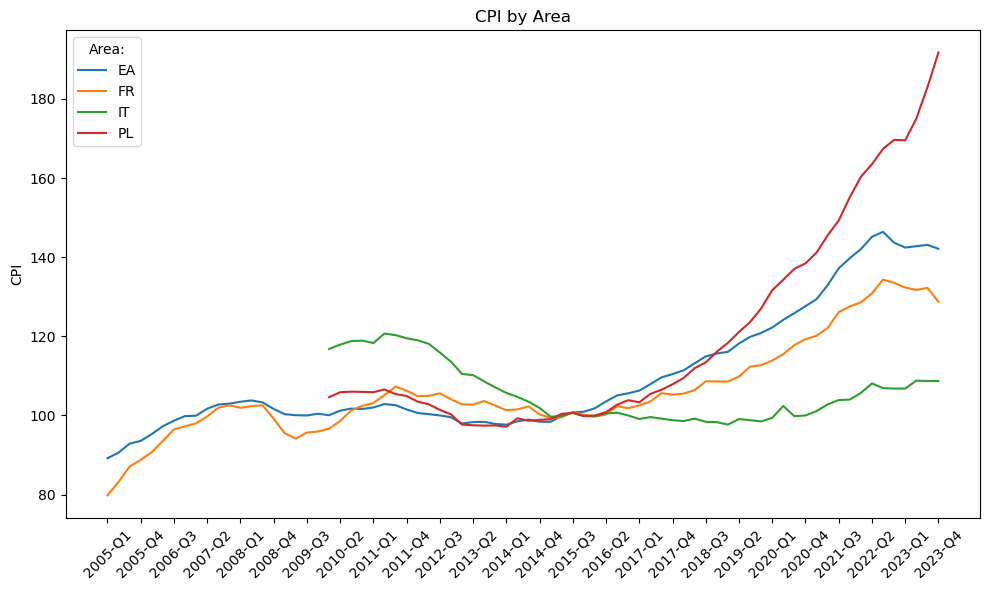

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Set the figure size as desired
for label, df in data.groupby('geo'):
    plt.plot(df['date'], df['cpi'], label=label)

# Set x-axis tick frequency: show every third tick
ax = plt.gca()  # Get the current axis
ticks = ax.get_xticks()  # Get current x-axis tick locations
tick_labels = ax.get_xticklabels()  # Get current x-axis tick labels

# Choose every third tick to display (we do not want to overburden the x-axis readability)
ticks_to_show = ticks[::3]
tick_labels_to_show = tick_labels[::3]

ax.set_xticks(ticks_to_show)  # Set the x-axis to show only every third tick
ax.set_xticklabels(tick_labels_to_show)  # Set the labels to show only every third tick

    
plt.title('CPI by Area')
#plt.xlabel('Date')
plt.ylabel('CPI')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend(title='Area:')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

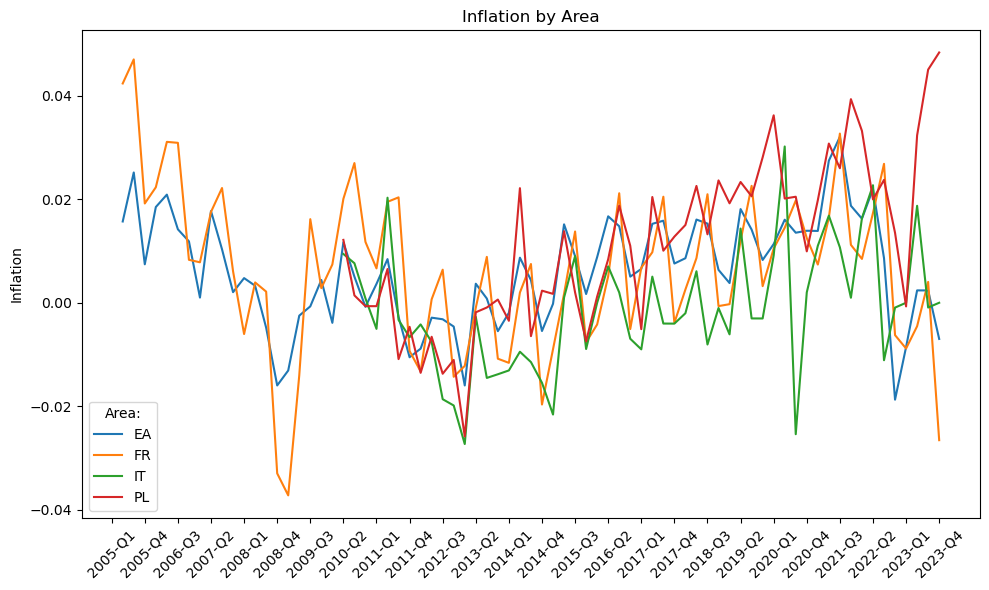

In [78]:
plt.figure(figsize=(10, 6))  # Set the figure size as desired
for label, df in data.groupby('geo'):
    plt.plot(df['date'], df['inflation'], label=label)

# Set x-axis tick frequency: show every third tick
ax = plt.gca()  # Get the current axis
ticks = ax.get_xticks()  # Get current x-axis tick locations
tick_labels = ax.get_xticklabels()  # Get current x-axis tick labels

# Choose every third tick to display (we do not want to overburden the x-axis readability)
ticks_to_show = ticks[::3]
tick_labels_to_show = tick_labels[::3]

ax.set_xticks(ticks_to_show)  # Set the x-axis to show only every third tick
ax.set_xticklabels(tick_labels_to_show)  # Set the labels to show only every third tick

    
plt.title('Inflation by Area')
#plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend(title='Area:')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

Let's put the two plots side-by-side

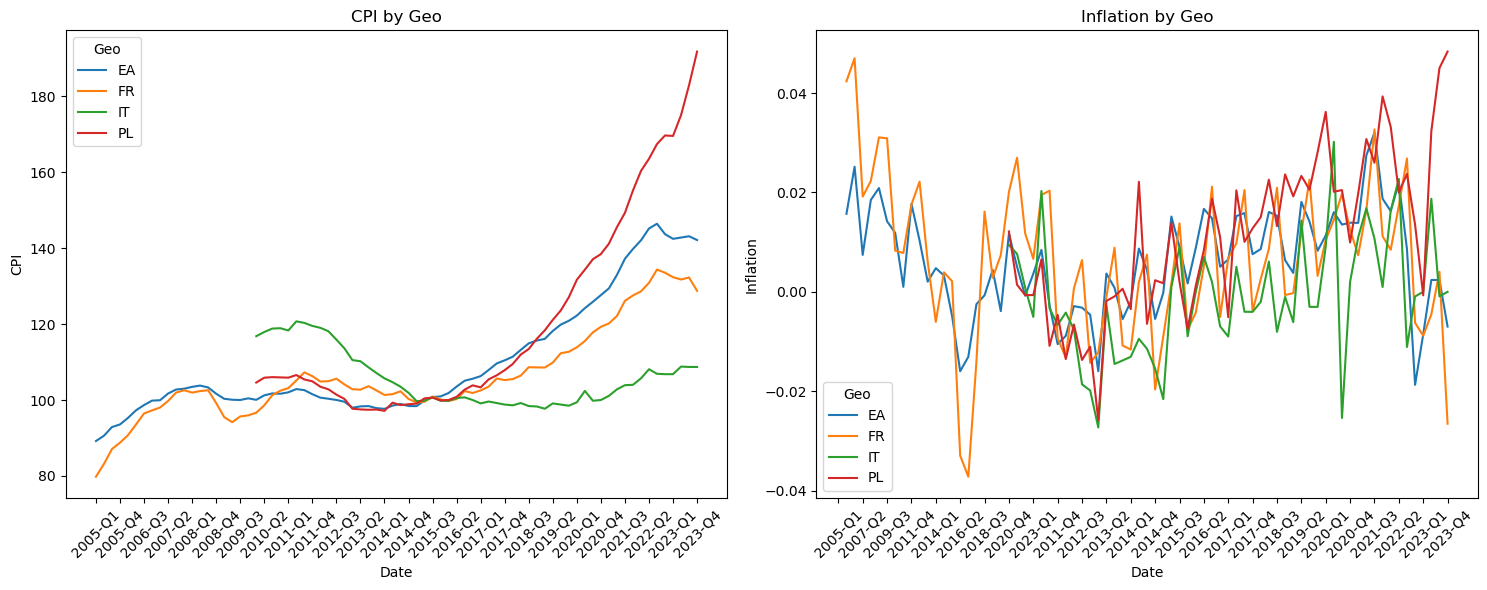

In [79]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Setup figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # 15 width, 6 height - Adjust size as needed

# Plot CPI on the left subplot (ax1)
for label, df in data.groupby('geo'):
    ax1.plot(df['date'], df['cpi'], label=label)

# Set ticks for CPI plot (ax1)
ticks = ax1.get_xticks()  # Get x-axis tick locations
tick_labels = ax1.get_xticklabels()  # Get x-axis tick labels
ax1.set_xticks(ticks[::3])  # Set to show only every third tick
ax1.set_xticklabels(tick_labels[::3], rotation=45)  # Apply rotation

ax1.set_title('CPI by Geo')
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI')
ax1.legend(title='Geo')

# Plot Inflation on the right subplot (ax2)
for label, df in data.groupby('geo'):
    ax2.plot(df['date'], df['inflation'], label=label)

# Set ticks for Inflation plot (ax2)
ax2.set_xticks(ticks[::3])  # Set to show only every third tick
ax2.set_xticklabels(tick_labels[::3], rotation=45)  # Apply rotation

ax2.set_title('Inflation by Geo')
ax2.set_xlabel('Date')
ax2.set_ylabel('Inflation')
ax2.legend(title='Geo')

# Adjust layout
plt.tight_layout()
plt.show()

### Exercise 10 

#### Go to the EUROSTAT website to find the series code for GDP, and plot on a panel on the left GDP and on the right inflation for 4 countries of your choice

https://ec.europa.eu/eurostat/data/database

Go to the above website

In [53]:
from IPython.display import display, HTML

# The URL of the website you want to embed
url = "https://ec.europa.eu/eurostat/databrowser/view/ei_etea_m/default/table?lang=en&category=euroind.ei_et"

# Define the HTML for the iframe
iframe = f'<iframe src="{url}" width="100%" height="300"></iframe>'

# Display the iframe in the notebook
display(HTML(iframe))

In [97]:
# Let's first create a dictionary to pass exactly the options that we want
data_options = {
    'unit' :'CLV10_MEUR',
    'geo' : ['EA', 'FR', 'IT', 'PL'],
    'na_item' : 'B1G'
}

# We download the dataset using this function
datagdp = eurostat.get_data_df('nama_10_gdp', filter_pars=data_options)

# Let's rename the geo column again
datagdp = datagdp.rename(columns = {
    'geo\\TIME_PERIOD' : 'geo'
})

# Then we can melt it
datagdp = datagdp.melt(id_vars = ['freq' ,'unit', 'na_item', 'geo'], var_name = 'date', value_name = 'GDP')

# Now we want to remove the rows when the value for GDP is NaN
datagdp = datagdp.dropna(subset = ['GDP'])

# Now let's arrange the dataframe in the proper way
datagdp = datagdp.sort_values(['geo', 'date'])

# Compute GDP growth
datagdp['lag_GDP'] = datagdp.groupby('geo')['GDP'].shift(1)
datagdp['growth'] = datagdp.groupby('geo', group_keys = False).apply(lambda x: 100*(x['GDP'] - x['lag_GDP'])/x['lag_GDP'],  include_groups = False)

# For the plot, we want to change the date object, currently an integer, to a datetime object!
datagdp['date'] = pd.to_datetime(datagdp['date'], format = '%Y')

with pd.option_context('display.max_rows', data.shape[0], 'display.max_columns', 10):
    print(datagdp) #need display to show the dataframe when using with in jupyter

    freq        unit na_item geo       date         GDP    lag_GDP    growth
80     A  CLV10_MEUR     B1G  EA 1995-01-01   6361976.8        NaN       NaN
84     A  CLV10_MEUR     B1G  EA 1996-01-01   6462895.5  6361976.8  1.586279
88     A  CLV10_MEUR     B1G  EA 1997-01-01   6627952.9  6462895.5  2.553923
92     A  CLV10_MEUR     B1G  EA 1998-01-01   6822513.3  6627952.9  2.935452
96     A  CLV10_MEUR     B1G  EA 1999-01-01   7014006.4  6822513.3  2.806782
100    A  CLV10_MEUR     B1G  EA 2000-01-01   7291316.5  7014006.4  3.953662
104    A  CLV10_MEUR     B1G  EA 2001-01-01   7627432.2  7291316.5  4.609808
108    A  CLV10_MEUR     B1G  EA 2002-01-01   7698332.8  7627432.2  0.929547
112    A  CLV10_MEUR     B1G  EA 2003-01-01   7739201.0  7698332.8  0.530871
116    A  CLV10_MEUR     B1G  EA 2004-01-01   7924661.5  7739201.0  2.396378
120    A  CLV10_MEUR     B1G  EA 2005-01-01   8042773.8  7924661.5  1.490440
124    A  CLV10_MEUR     B1G  EA 2006-01-01   8296968.3  8042773.8  3.160533

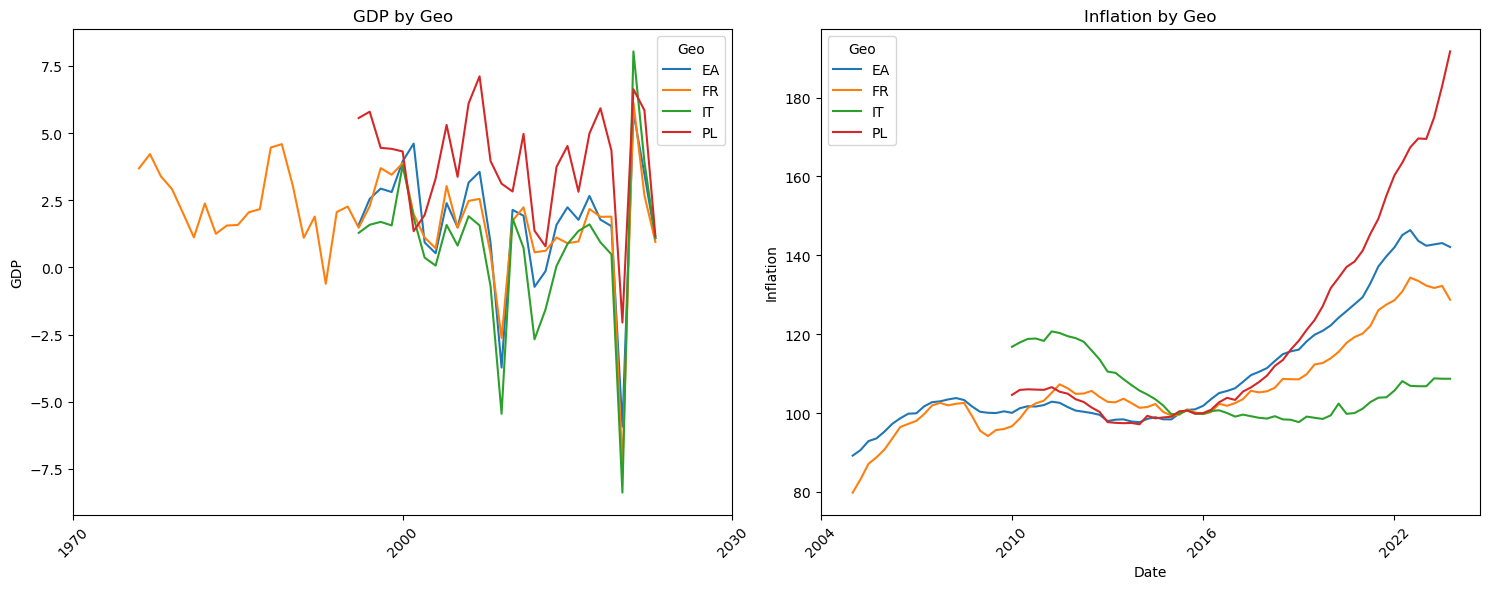

In [110]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Setup figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # 15 width, 6 height - Adjust size as needed

# Plot CPI on the left subplot (ax1)
for label, df in datagdp.groupby('geo'):
    ax1.plot(df['date'], df['growth'], label=label)

# Set ticks for CPI plot (ax1)
ticks = ax1.get_xticks()  # Get x-axis tick locations
tick_labels = ax1.get_xticklabels()  # Get x-axis tick labels
ax1.set_xticks(ticks[::3])  # Set to show only every third tick
ax1.set_xticklabels(tick_labels[::3], rotation=45)  # Apply rotation

ax1.set_title('GDP by Geo')
ax1.set_ylabel('GDP')
ax1.legend(title='Geo')

# Plot Inflation on the right subplot (ax2)
for label, df in data.groupby('geo'):
    ax2.plot(df['date'], df['cpi'], label=label)

# Set ticks for Inflation plot (ax2)
ticks = ax2.get_xticks()  # Get x-axis tick locations
tick_labels = ax2.get_xticklabels()  # Get x-axis tick labels
ax2.set_xticks(ticks[::3])  # Set to show only every third tick
ax2.set_xticklabels(tick_labels[::3], rotation=45)  # Apply rotation

ax2.set_title('Inflation by Geo')
ax2.set_xlabel('Date')
ax2.set_ylabel('Inflation')
ax2.legend(title='Geo')

# Adjust layout
plt.tight_layout()
plt.show()